In [32]:
import numpy as np
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

Построение доверительного интервала с помощью статистики Σ((Xk)^2)/n

In [33]:
def Statistic1(X, gamma):
    a = scipy.stats.chi2(X.shape[0]).ppf((1 + gamma) / 2)
    b = scipy.stats.chi2(X.shape[0]).ppf((1 - gamma) / 2)
    statistic = np.sum(np.power(X, 2))
    left = statistic/a
    right = statistic/b
    return left, right

Построение доверительного интервала с помощью статистики (Σ(Xk/n))^2

In [34]:
def Statistic2(X, gamma):
    a = scipy.stats.norm().ppf((3 + gamma) / 4) ** 2
    b = scipy.stats.norm().ppf((3 - gamma) / 4) ** 2
    statistic = (np.mean(X) ** 2) * X.shape[0]
    left = statistic/a
    right = statistic/b
    return left, right

Генерация выборки размера n из N(0, sigma^2)

In [35]:
def x_stat(sigma, n):
    return np.random.normal(scale=np.sqrt(sigma), size=n)

In [36]:
gamma = 0.95
sigma = 1
sns.set()
stat1_left = []
stat1_right = []
stat2_left = []
stat2_right = []

n_set = list(range(10, 10000, 100))

for n in n_set:
    X = x_stat(sigma, n)
    
    left, right = Statistic1(X, gamma)
    stat1_left.append(left)
    stat1_right.append(right)
    
    left, right = Statistic2(X, gamma)
    stat2_left.append(left)
    stat2_right.append(right)

Построение графика

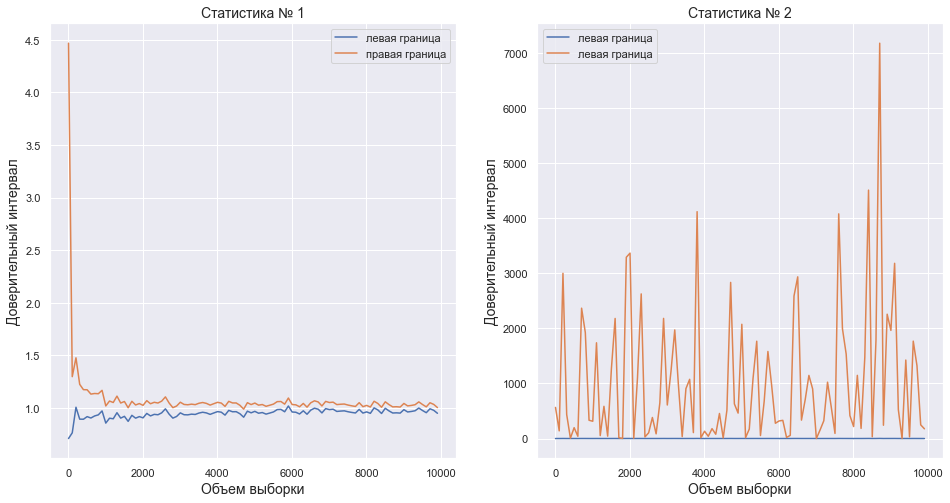

In [37]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(n_set, stat1_left, label="левая граница")  
plt.plot(n_set, stat1_right, label="правая граница")  
plt.title("Статистика № 1", fontsize=14)
plt.xlabel("Объем выборки", fontsize=14) 
plt.ylabel("Доверительный интервал", fontsize=14)
plt.legend()
plt.grid(True)    

plt.subplot(1, 2, 2)
plt.plot(n_set, stat2_left, label="левая граница")  
plt.plot(n_set, stat2_right, label="левая граница")  
plt.title("Статистика № 2", fontsize=14)
plt.xlabel("Объем выборки", fontsize=14) 
plt.ylabel("Доверительный интервал", fontsize=14)
plt.legend()
plt.grid(True) 

#Вывод

Как видно из полученных графиков, чем больше объем выборки, тем точнее можно построить доверительный интервал в случае применения 1-ой статистики. При применении статистки №2, напротив, рост объема выборки не сказывается на точности построения доверительного интервала. Значит, для данного распределения статистика №2 не применима для построения доверительных интервалов.